In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statistics import geometric_mean, harmonic_mean
from sklearnex import patch_sklearn, unpatch_sklearn

patch_sklearn()

from sklearn.preprocessing import (
    StandardScaler,
    MinMaxScaler,
    RobustScaler,
    LabelEncoder,
    PolynomialFeatures,
)
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import (
    accuracy_score,
    f1_score,
    precision_score,
    recall_score,
    confusion_matrix,
    classification_report,
)


Intel(R) Extension for Scikit-learn* enabled (https://github.com/intel/scikit-learn-intelex)


In [2]:
from ucimlrepo import fetch_ucirepo

# fetch dataset
breast_cancer_wisconsin_diagnostic = fetch_ucirepo(id=17)

# data (as pandas dataframes)
X: pd.DataFrame = breast_cancer_wisconsin_diagnostic.data.features
y: pd.DataFrame = breast_cancer_wisconsin_diagnostic.data.targets

# metadata
print(breast_cancer_wisconsin_diagnostic.metadata)

# variable information
print(breast_cancer_wisconsin_diagnostic.variables)


{'uci_id': 17, 'name': 'Breast Cancer Wisconsin (Diagnostic)', 'repository_url': 'https://archive.ics.uci.edu/dataset/17/breast+cancer+wisconsin+diagnostic', 'data_url': 'https://archive.ics.uci.edu/static/public/17/data.csv', 'abstract': 'Diagnostic Wisconsin Breast Cancer Database.', 'area': 'Health and Medicine', 'tasks': ['Classification'], 'characteristics': ['Multivariate'], 'num_instances': 569, 'num_features': 30, 'feature_types': ['Real'], 'demographics': [], 'target_col': ['Diagnosis'], 'index_col': ['ID'], 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_of_dataset_creation': 1993, 'last_updated': 'Fri Nov 03 2023', 'dataset_doi': '10.24432/C5DW2B', 'creators': ['William Wolberg', 'Olvi Mangasarian', 'Nick Street', 'W. Street'], 'intro_paper': {'title': 'Nuclear feature extraction for breast tumor diagnosis', 'authors': 'W. Street, W. Wolberg, O. Mangasarian', 'published_in': 'Electronic imaging', 'year': 1993, 'url': 'https://www.semanticscholar.org/paper/53

In [3]:
X.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 30 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   radius1             569 non-null    float64
 1   texture1            569 non-null    float64
 2   perimeter1          569 non-null    float64
 3   area1               569 non-null    float64
 4   smoothness1         569 non-null    float64
 5   compactness1        569 non-null    float64
 6   concavity1          569 non-null    float64
 7   concave_points1     569 non-null    float64
 8   symmetry1           569 non-null    float64
 9   fractal_dimension1  569 non-null    float64
 10  radius2             569 non-null    float64
 11  texture2            569 non-null    float64
 12  perimeter2          569 non-null    float64
 13  area2               569 non-null    float64
 14  smoothness2         569 non-null    float64
 15  compactness2        569 non-null    float64
 16  concavit

In [4]:
X.describe()


,radius1,texture1,perimeter1,area1,smoothness1,compactness1,concavity1,concave_points1,symmetry1,fractal_dimension1,...,radius3,texture3,perimeter3,area3,smoothness3,compactness3,concavity3,concave_points3,symmetry3,fractal_dimension3
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


In [5]:
y.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 1 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Diagnosis  569 non-null    object
dtypes: object(1)
memory usage: 4.6+ KB


In [6]:
y.describe()


,Diagnosis
count,569
unique,2
top,B
freq,357


In [13]:
encoder = LabelEncoder()
encoder.fit(y["Diagnosis"])
targetDF = pd.Series(encoder.transform(y["Diagnosis"]), name="Diagnosis")
targetDF


0      1
1      1
2      1
3      1
4      1
      ..
564    1
565    1
566    1
567    1
568    0
Name: Diagnosis, Length: 569, dtype: int32

In [18]:
cancerDict = {}
for idx in range(len(X.columns[:10])):
    key = X.columns[idx].strip("1")
    if idx in [3, 9]:
        cancerDict[key] = X[X.columns[idx::10]].T.apply(geometric_mean)
    elif idx in [4, 5, 8]:
        cancerDict[key] = X[X.columns[idx::10]].T.apply(harmonic_mean)
    else:
        cancerDict[key] = X[X.columns[idx::10]].mean(axis=1)


In [23]:
featureDF = pd.DataFrame(cancerDict)
featureDF


,radius,texture,perimeter,area,smoothness,compactness,concavity,concave_points,symmetry,fractal_dimension
0,14.821667,9.538433,105.329667,676.807639,0.017556,0.117664,0.355243,0.142790,0.075743,0.038699
1,15.367833,13.971300,98.366000,577.038047,0.014200,0.031737,0.115700,0.089857,0.036969,0.026119
2,14.668533,15.855633,95.695000,578.217691,0.016793,0.089360,0.228707,0.130493,0.057642,0.028851
3,8.941867,16.012000,59.965000,181.393664,0.024680,0.165882,0.328303,0.127123,0.135580,0.053742
4,14.529067,10.597100,97.579333,577.819469,0.028769,0.056559,0.218293,0.095217,0.044974,0.028482
...,...,...,...,...,...,...,...,...,...,...
564,16.062000,16.682000,105.257667,780.667830,0.026504,0.062564,0.235527,0.128347,0.029876,0.025692
565,14.861833,22.987667,97.134333,600.169971,0.015613,0.053433,0.168333,0.092497,0.048167,0.020933
566,12.012133,21.091667,79.475000,360.438480,0.015788,0.075359,0.160037,0.070130,0.034614,0.025808
567,15.688667,23.448333,110.157333,583.448906,0.017870,0.142850,0.453757,0.144547,0.060425,0.037753


In [22]:
cancerDF = pd.concat([featureDF, targetDF], axis=1)
cancerDF


,radius,texture,perimeter,area,smoothness,compactness,concavity,concave_points,symmetry,fractal_dimension,Diagnosis
0,14.821667,9.538433,105.329667,676.807639,0.017556,0.117664,0.355243,0.142790,0.075743,0.038699,1
1,15.367833,13.971300,98.366000,577.038047,0.014200,0.031737,0.115700,0.089857,0.036969,0.026119,1
2,14.668533,15.855633,95.695000,578.217691,0.016793,0.089360,0.228707,0.130493,0.057642,0.028851,1
3,8.941867,16.012000,59.965000,181.393664,0.024680,0.165882,0.328303,0.127123,0.135580,0.053742,1
4,14.529067,10.597100,97.579333,577.819469,0.028769,0.056559,0.218293,0.095217,0.044974,0.028482,1
...,...,...,...,...,...,...,...,...,...,...,...
564,16.062000,16.682000,105.257667,780.667830,0.026504,0.062564,0.235527,0.128347,0.029876,0.025692,1
565,14.861833,22.987667,97.134333,600.169971,0.015613,0.053433,0.168333,0.092497,0.048167,0.020933,1
566,12.012133,21.091667,79.475000,360.438480,0.015788,0.075359,0.160037,0.070130,0.034614,0.025808,1
567,15.688667,23.448333,110.157333,583.448906,0.017870,0.142850,0.453757,0.144547,0.060425,0.037753,1


In [25]:
cancerDF.corr()["Diagnosis"]


radius               0.763319
texture              0.438766
perimeter            0.771540
area                 0.697463
smoothness          -0.051293
compactness          0.399745
concavity            0.662430
concave_points       0.798201
symmetry             0.013830
fractal_dimension    0.168125
Diagnosis            1.000000
Name: Diagnosis, dtype: float64

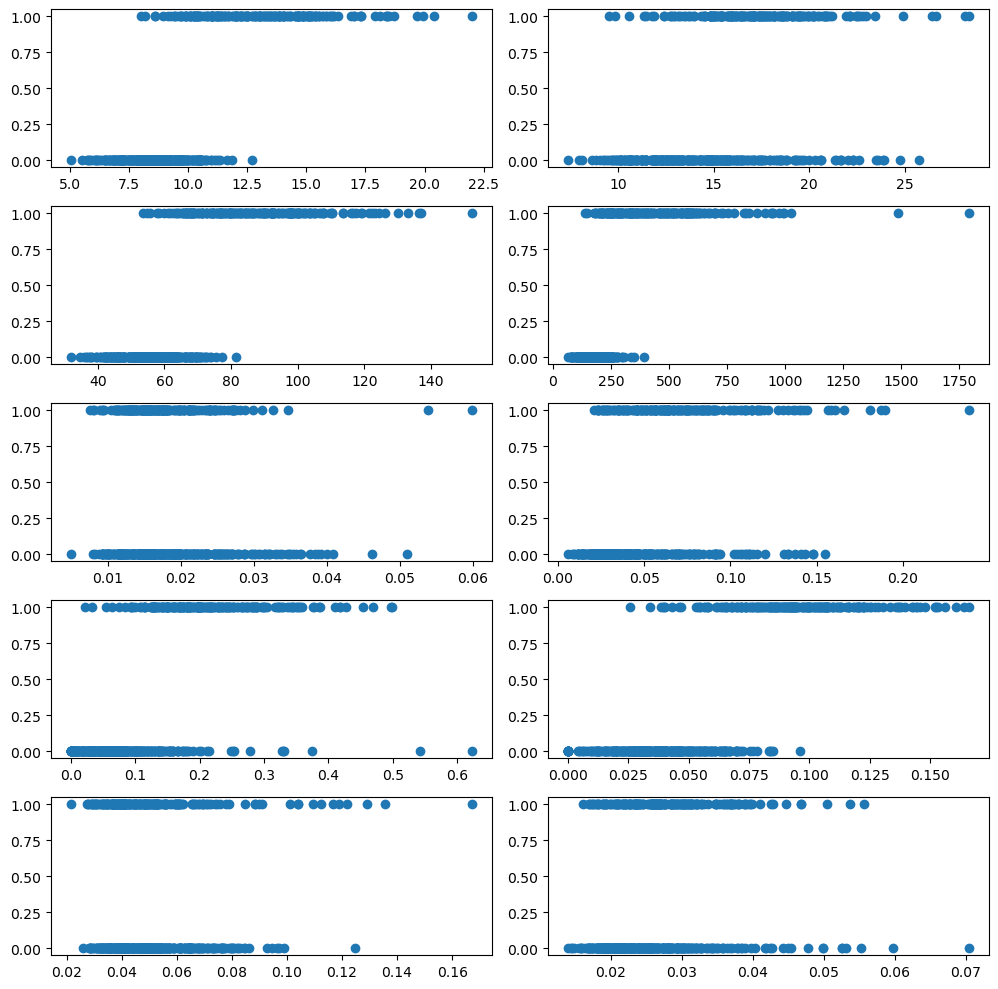

In [31]:
plt.figure(figsize=(10, 10))
for i in range(len(cancerDF.columns[:-1])):
    plt.subplot(5, 2, i + 1)
    plt.scatter(cancerDF[cancerDF.columns[i]], cancerDF["Diagnosis"])
plt.tight_layout()
plt.show()
